1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [ ]:
import pandas as pd  


df = pd.read_csv('open_rank_20236.csv')  
 
value_column = df['value']  
 
max_value = value_column.max()  
min_value = value_column.min()  
mean_value = value_column.mean()  
median_value = value_column.median()  

print(f"最大值: {max_value}")  
print(f"最小值: {min_value}")  
print(f"均值: {mean_value}")  
print(f"中位数: {median_value}")

最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [8]:
import pandas as pd
df = pd.read_csv('activity_2022.csv')
begin = df['20221_value']
end = df['202212_value']
sum = 0
for i in range(len(begin)):
    sum = (sum + (end[i] - begin[i])/begin[i]) 
print("{:.2f}%".format((sum/len(begin))*100))

-4.74%


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [ ]:
import pandas as pd
df1 = pd.read_csv('china_2022.csv')
df2 = pd.read_csv('global_2022.csv')
print(df1['open_issue'].mean(),df2['open_issue'].mean())
print(df1['open_pull'].mean(),df2['open_pull'].mean())
print(df1['valueDelta'].mean(),df2['valueDelta'].mean())
sum1 = sum2 = 0
for i in range(0,len(df1)): 
    sum1 = sum1 + df1['issue_comment'][i]/df1['open_issue'][i]
    sum2 = sum2 + df2['issue_comment'][i]/df2['open_issue'][i]
res1 = sum1/len(df1)
res2 = sum2/len(df2)
print(res1,res2)



9169.2 43300.2
16912.7 83423.0
9265.007000000001 11906.920999999998
8.162392433600044 7.636352124129397


根据分析，在开源的问题和拉取请求的数量上，国际前十企业的数量要远远高于国内，说明开源领域的规模相差很大。  
而企业价值变化量国际前十略高，说明大型企业价值浮动也较大。  
再分析项目问题相关的评论数量与项目问题数量的比值，国内企业的比值略高于国际，说明项目活跃度国内其实很高，成员的关注度和贡献度是不错的。

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [18]:
urhy = 0.85 
urhn = 0.15
rhy = 0.1
rhn = 0.9
r = 0.75
ur = 0.25
res = (ur * urhy)/(ur * urhy + r * rhy)
print(res)

0.7391304347826088


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [19]:
g = 0.5
ug = 0.5
gjy = 0.35
ugjy = 0.1
res = (g * gjy)/(g * gjy + ug * ugjy)
print(res)

0.7777777777777778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

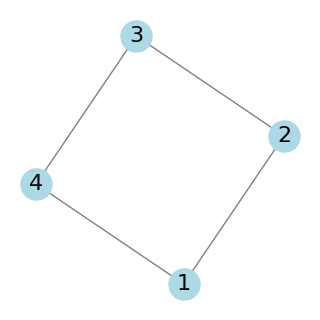

In [ ]:
import networkx as nx  
import matplotlib.pyplot as plt  
user = [1, 2, 3, 4]  
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]  
G = nx.Graph()  
# 添加节点  
for u in user:  
    G.add_node(u)  
# 添加边  
for e in edge:  
    G.add_edge(e[0], e[1])  
plt.figure(figsize=(3, 3))
# 绘制图形  
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, edge_color='gray')  
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

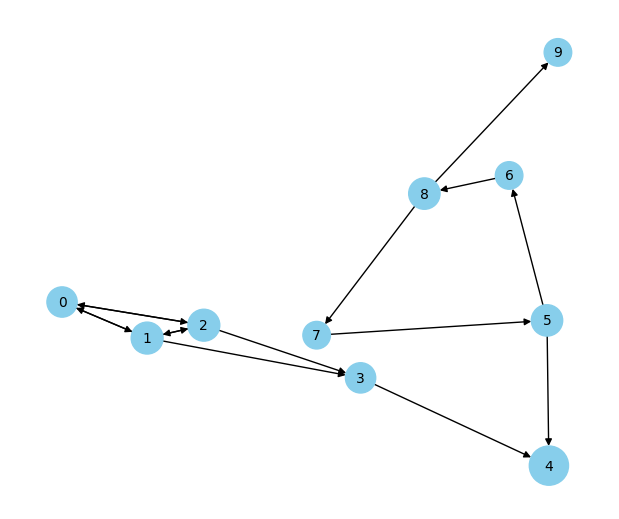

In [16]:
import networkx as nx  
import matplotlib.pyplot as plt  
  
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),  
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),  
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]  
G = nx.DiGraph()  
for user in users:  
    G.add_node(user)  
for edge in edges:  
    G.add_edge(edge[0], edge[1])  

pageranks = nx.pagerank(G)
node_sizes = [pageranks[node] * 5000 for node in G.nodes()]

plt.figure(figsize=(6,5))  
pos = nx.spring_layout(G)    
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=node_sizes, font_size=10, arrowsize=10)  
plt.show()